<a href="https://colab.research.google.com/github/RifatAhmed1/Machine-Learning-Projects/blob/master/XAI_application_on_a_CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project aims to utilize eXplainable Artificial Intelligence to test the credibility of a custom Convolutional Neural Network Model. For this purpose, Grad-CAM, Grad-CAM++ and LIME interpretation techniques are used in this notebook.

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=e9d5dd97a320072ba17e0d718ed912ad8f3869cb091de3e3872d39e4d3412985
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
from skimage.io import imread
import os, os, shutil, pathlib
from google.colab import files
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, concatenate, RandomRotation, RandomZoom, Rescaling, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import image_dataset_from_directory, plot_model

In [ ]:
# @title
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset
!unzip -qq new-plant-diseases-dataset.zip

%rm new-plant-diseases-dataset.zip
%rm -rf new\ plant\ diseases\ dataset\(augmented\)

%cd /content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train

%rm -rf Apple___Apple_scab
%rm -rf Apple___Black_rot
%rm -rf Apple___Cedar_apple_rust
%rm -rf Apple___healthy
%rm -rf Blueberry___healthy
%rm -rf Cherry_\(including_sour\)___Powdery_mildew
%rm -rf Cherry_\(including_sour\)___healthy
%rm -rf Grape___Black_rot
%rm -rf Grape___Esca_\(Black_Measles\)
%rm -rf Grape___Leaf_blight_\(Isariopsis_Leaf_Spot\)
%rm -rf Grape___healthy
%rm -rf Orange___Haunglongbing_\(Citrus_greening\)
%rm -rf Peach___Bacterial_spot
%rm -rf Peach___healthy
%rm -rf Pepper,_bell___Bacterial_spot
%rm -rf Pepper,_bell___healthy
%rm -rf Raspberry___healthy
%rm -rf Soybean___healthy
%rm -rf Squash___Powdery_mildew
%rm -rf Strawberry___Leaf_scorch
%rm -rf Strawberry___healthy
%rm -rf Potato___Early_blight
%rm -rf Potato___Late_blight
%rm -rf Potato___healthy
%rm -rf Corn_\(maize\)___Cercospora_leaf_spot\ Gray_leaf_spot
%rm -rf Corn_\(maize\)___Common_rust_
%rm -rf Corn_\(maize\)___Northern_Leaf_Blight
%rm -rf Corn_\(maize\)___healthy

%cd /content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid

%rm -rf Apple___Apple_scab
%rm -rf Apple___Black_rot
%rm -rf Apple___Cedar_apple_rust
%rm -rf Apple___healthy
%rm -rf Blueberry___healthy
%rm -rf Cherry_\(including_sour\)___Powdery_mildew
%rm -rf Cherry_\(including_sour\)___healthy
%rm -rf Grape___Black_rot
%rm -rf Grape___Esca_\(Black_Measles\)
%rm -rf Grape___Leaf_blight_\(Isariopsis_Leaf_Spot\)
%rm -rf Grape___healthy
%rm -rf Orange___Haunglongbing_\(Citrus_greening\)
%rm -rf Peach___Bacterial_spot
%rm -rf Peach___healthy
%rm -rf Pepper,_bell___Bacterial_spot
%rm -rf Pepper,_bell___healthy
%rm -rf Raspberry___healthy
%rm -rf Soybean___healthy
%rm -rf Squash___Powdery_mildew
%rm -rf Strawberry___Leaf_scorch
%rm -rf Strawberry___healthy
%rm -rf Potato___Early_blight
%rm -rf Potato___Late_blight
%rm -rf Potato___healthy
%rm -rf Corn_\(maize\)___Cercospora_leaf_spot\ Gray_leaf_spot
%rm -rf Corn_\(maize\)___Common_rust_
%rm -rf Corn_\(maize\)___Northern_Leaf_Blight
%rm -rf Corn_\(maize\)___healthy

%cd /content

base_dir = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"

fldrs = os.listdir(base_dir + "/train")
#print(fldrs)
for fld in fldrs:
  source_folder = base_dir + "/valid/" + fld
  destination_folder = base_dir + "/train/" + fld

  # fetch all files
  f = os.listdir(source_folder)
  #print(f)
  for file_name in f:
      # construct full file path
      source = source_folder +"/"+ file_name
      destination = destination_folder +"/"+ file_name
      # move only files
      if os.path.isfile(source):
          shutil.move(source, destination)
          #print('Moved:', file_name)

for f in os.listdir("/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"):
  os.makedirs("/content/dataset/train/"+f)
  os.makedirs("/content/dataset/valid/"+f)
  os.makedirs("/content/dataset/test/"+f)

base_dir = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"

for f in os.listdir(base_dir):
  src_fldr = base_dir + "/" + f
  dst_fldr = "/content/dataset/train/"+f

  file_list = os.listdir(src_fldr)
  file_list = [f for f in file_list if os.path.isfile(os.path.join(src_fldr, f))]

  for file_name in file_list[:1272]:
    source_file_path = os.path.join(src_fldr, file_name)
    destination_file_path = os.path.join(dst_fldr, file_name)
    shutil.copy2(source_file_path, destination_file_path)

for f in os.listdir(base_dir):
  src_fldr = base_dir + "/" + f
  dst_fldr = "/content/dataset/valid/"+f

  file_list = os.listdir(src_fldr)
  file_list = [f for f in file_list if os.path.isfile(os.path.join(src_fldr, f))]

  for file_name in file_list[1272:1696]:
    source_file_path = os.path.join(src_fldr, file_name)
    destination_file_path = os.path.join(dst_fldr, file_name)
    shutil.copy2(source_file_path, destination_file_path)

for f in os.listdir(base_dir):
  src_fldr = base_dir + "/" + f
  dst_fldr = "/content/dataset/test/"+f

  file_list = os.listdir(src_fldr)
  file_list = [f for f in file_list if os.path.isfile(os.path.join(src_fldr, f))]

  for file_name in file_list[1696:2120]:
    source_file_path = os.path.join(src_fldr, file_name)
    destination_file_path = os.path.join(dst_fldr, file_name)
    shutil.copy2(source_file_path, destination_file_path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt


Mounted at /content/drive


In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Thesis/Tomato Leaf Image Classification/models_21_august_2023/base_model_1_973.keras')
#test_loss, test_acc = test_model.evaluate(test_dataset)
#print(f"Test accuracy: {test_acc:.3f}")

In [ ]:
def get_img_array(img_path, target_size):
  img = keras.utils.load_img(img_path, target_size=target_size)
  array = keras.utils.img_to_array(img)
  array = np.expand_dims(array, axis=0)
  return array

In [ ]:
model.summary()

Model: "base_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                 

In [ ]:
last_conv_layer_name = 'conv2d_2'
classifier_layer_names = ["max_pooling2d_2", "flatten", 'dropout', 'dense', 'dense_1']

In [ ]:
input = Input(shape=(180,180,3))
z = input
z = model.layers[1].layers[0](z)
z = model.layers[1].layers[1](z)
z = model.layers[1].layers[2](z)

augment_model = Model(input, z)

print(augment_model.output.shape)

(None, 180, 180, 3)


In [ ]:
input2 = Input(shape=augment_model.output.shape[1:])
y = input2
for i in range(5):
  y = model.layers[i+2](y)
last_conv_layer_model = Model(input2,y)

In [ ]:
classifier_input = keras.Input(shape=last_conv_layer_model.output.shape[1:])
x = classifier_input
for layer_name in classifier_layer_names:
  x = model.get_layer(layer_name)(x)
classifier_model = keras.Model(classifier_input, x)

In [ ]:
last_conv_layer_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7385

In [ ]:
target_size = (180,180)
img_paths =["/content/folder/Bacterial Spot.jpg",
            "/content/folder/Early Blight.jpg",
            "/content/folder/Healthy.jpg",
            "/content/folder/Late Blight.jpg",
            "/content/folder/Leaf Mold.jpg",
            '/content/folder/Septoria Leaf Spot.jpg',
            '/content/folder/Spider mites.jpg',
            '/content/folder/Target Spot.jpg',
            '/content/folder/Tomato Mosaic Virus.jpg',
            '/content/folder/Yellow Leaf Curl Virus.jpg']


In [ ]:
img_path = img_paths[1]
img_array = get_img_array(img_path, target_size=target_size)

In [ ]:
with tf.GradientTape() as tape:
  augment_model_output = augment_model(img_array)
  tape.watch(augment_model_output)
  last_conv_layer_output = last_conv_layer_model(augment_model_output)
  tape.watch(last_conv_layer_output)

  preds= classifier_model(last_conv_layer_output)
  top_pred_index = tf.argmax(preds[0])
  top_class_channel = preds[:, top_pred_index]

In [ ]:
grads = tape.gradient(top_class_channel, last_conv_layer_output)
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2)).numpy()
print(pooled_grads.shape)
last_conv_layer_output_2 = last_conv_layer_output
last_conv_layer_output = last_conv_layer_output.numpy()[0]
for i in range(pooled_grads.shape[-1]):
  last_conv_layer_output[:, :, i] *= pooled_grads[i]

heatmap = np.mean(last_conv_layer_output, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

(128,)


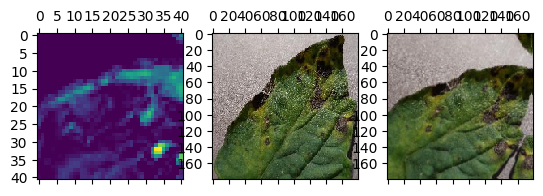

In [ ]:
# @title
m = augment_model_output[0]
a = img_array[0]/255

fig = plt.figure()
ax = fig.add_subplot(131)
ax.matshow(heatmap)
ax1 = fig.add_subplot(132)
ax1.matshow(a)
ax2 = fig.add_subplot(133)
ax2.matshow(m)
plt.show()

In [ ]:
conv_layer = last_conv_layer_model.get_layer('conv2d_2')
#heatmap_model = Model([model.inputs], [conv_layer.output, model.output])

with tf.GradientTape() as gtape1:
    with tf.GradientTape() as gtape2:
        with tf.GradientTape() as gtape3:
            conv_output = last_conv_layer_model(augment_model_output)
            predictions = classifier_model(conv_output)
            #if category_id is None:
            category_id = np.argmax(predictions[0])
            #if label_name is not None:
            #print(category_id)
            output = predictions[:, category_id]
            conv_first_grad = gtape3.gradient(output, conv_output)
        conv_second_grad = gtape2.gradient(conv_first_grad, conv_output)
    conv_third_grad = gtape1.gradient(conv_second_grad, conv_output)

global_sum = np.sum(conv_output, axis=(0, 1, 2))

alpha_num = conv_second_grad[0]
alpha_denom = conv_second_grad[0]*2.0 + conv_third_grad[0]*global_sum
alpha_denom = np.where(alpha_denom != 0.0, alpha_denom, 1e-10)

alphas = alpha_num/alpha_denom
alpha_normalization_constant = np.sum(alphas, axis=(0,1))
alphas /= alpha_normalization_constant

weights = np.maximum(conv_first_grad[0], 0.0)

deep_linearization_weights = np.sum(weights*alphas, axis=(0,1))
grad_cam_map = np.sum(deep_linearization_weights*conv_output[0], axis=2)

heatmap_2 = np.maximum(grad_cam_map, 0)
max_heat = np.max(heatmap_2)
if max_heat == 0:
    max_heat = 1e-10
heatmap_2 /= max_heat

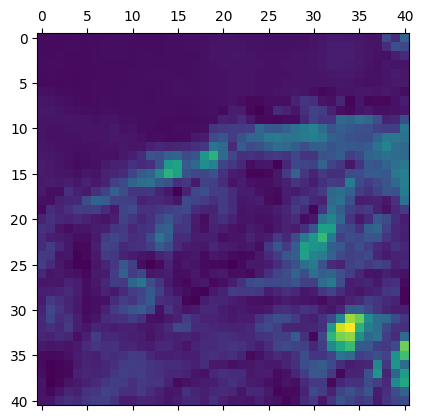

In [ ]:
plt.matshow(heatmap_2)

In [ ]:
# @title
import matplotlib.cm as cm
heatmap = np.uint8(255 * heatmap)


jet = cm.get_cmap("jet")
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

jet_heatmap = keras.utils.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((augment_model_output[0].shape[1], augment_model_output[0].shape[0]))
jet_heatmap = keras.utils.img_to_array(jet_heatmap)

heatmap_2 = np.uint8(255 * heatmap_2)


jet = cm.get_cmap("jet")
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap_2 = jet_colors[heatmap_2]

jet_heatmap_2 = keras.utils.array_to_img(jet_heatmap_2)
jet_heatmap_2 = jet_heatmap_2.resize((augment_model_output[0].shape[1], augment_model_output[0].shape[0]))
jet_heatmap_2 = keras.utils.img_to_array(jet_heatmap_2)

<ipython-input-105-020d16dbf5bf>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")
<ipython-input-105-020d16dbf5bf>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


In [ ]:
# @title
superimposed_img = jet_heatmap * 0.4 /255+ m
superimposed_img_2 = jet_heatmap_2 * 0.4 /255+ m


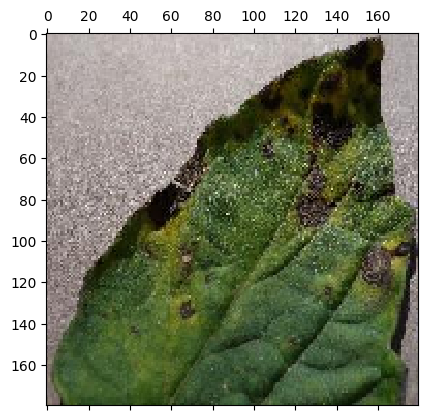

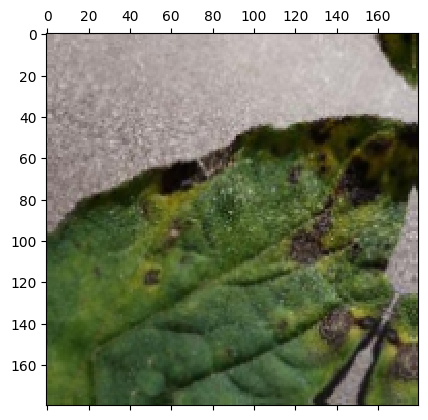

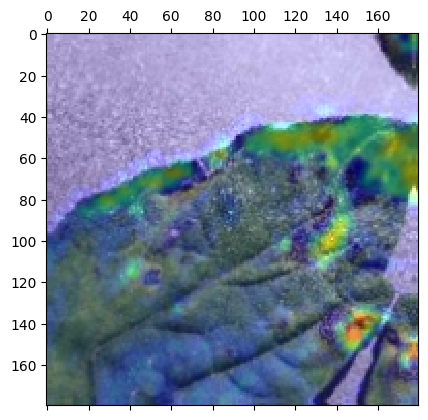

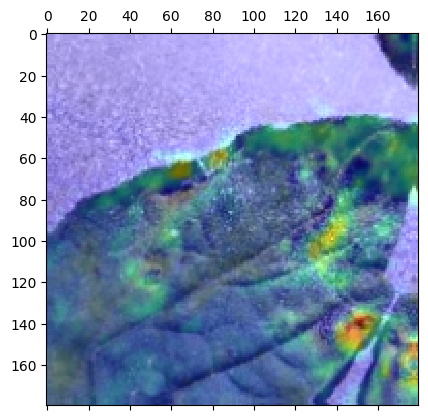

In [ ]:


#plt.set_title('Input Image')
plt.matshow(a)

#plt.set_title('Augmented Image')
plt.matshow(m)

#plt.set_title('Grad-CAM')
plt.matshow(superimposed_img)

#plt.set_title('Grad-CAM++')
plt.matshow(superimposed_img_2)



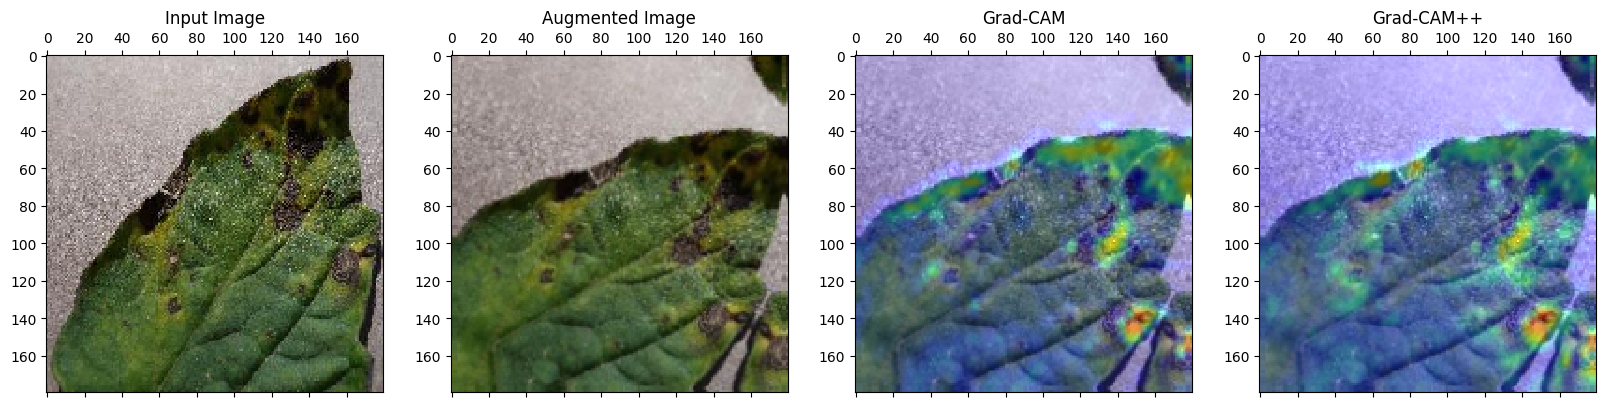

In [ ]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(141)
ax1.set_title('Input Image')
ax1.matshow(a)
ax2 = fig.add_subplot(142)
ax2.set_title('Augmented Image')
ax2.matshow(m)
ax3 = fig.add_subplot(143)
ax3.set_title('Grad-CAM')
ax3.matshow(superimposed_img)
ax4 = fig.add_subplot(144)
ax4.set_title('Grad-CAM++')
ax4.matshow(superimposed_img_2)
plt.show()

In [ ]:
input_a = Input(shape=(180,180,3))
zen = input_a
zen = last_conv_layer_model(zen)
zen = classifier_model(zen)
lime_model = Model(input_a,zen)
lime_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 model_1 (Functional)        (None, 41, 41, 128)       93248     
                                                                 
 model_2 (Functional)        (None, 10)                3277514   
                                                                 
Total params: 3370762 (12.86 MB)
Trainable params: 3370762 (12.86 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
%load_ext autoreload
%autoreload 2
import os, sys
import lime
from lime import lime_image

In [ ]:
explainer = lime_image.LimeImageExplainer()

In [ ]:
%time
explanation = explainer.explain_instance(augment_model_output[0].numpy(), lime_model.predict, top_labels=5, hide_color=0, num_samples=1000)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.15 µs


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


In [ ]:
from skimage.segmentation import mark_boundaries

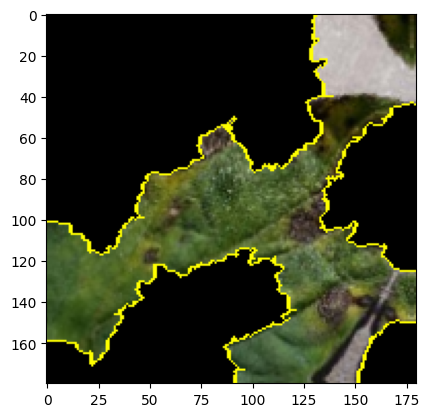

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp, mask))
#temp / 2 + 0.5

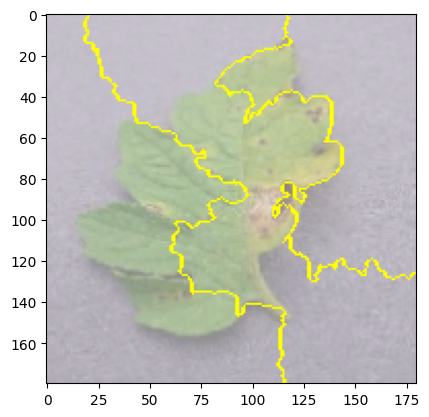

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

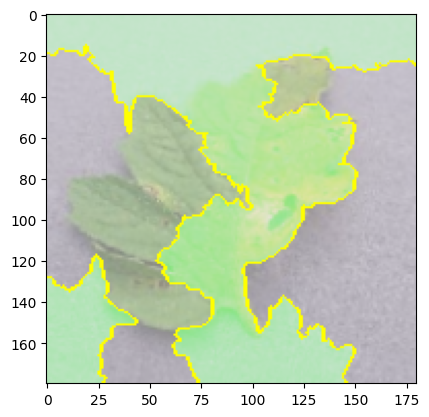

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

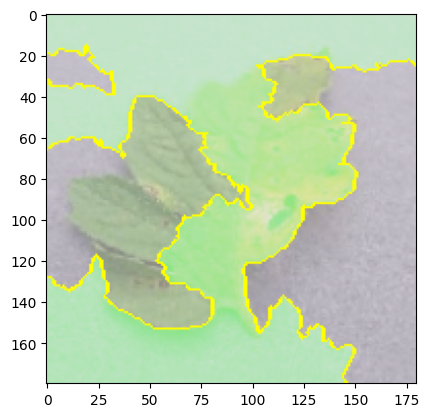

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

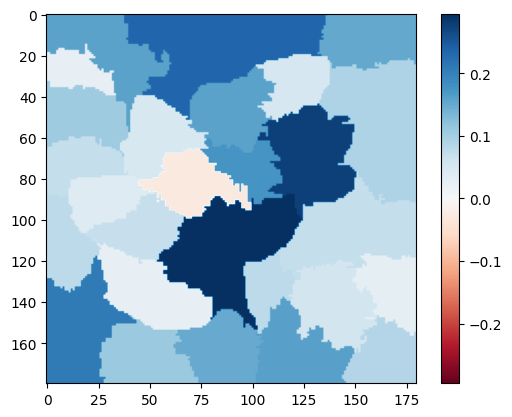

In [ ]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()